# 1. Introduction to Ensemble Learning

**Ensemble learning** is a technique that combines predictions from multiple models to improve accuracy and robustness.

Why Use Ensemble Learning?
- It helps to reduce overfitting.
- It increases the generalization of models.
- It leverages the strengths of multiple models.

**Problem Statement:**

The objective of this project is to predict median house prices in California using the California Housing dataset, which includes features like median income, housing age, and population density.

Accurate predictions help real estate stakeholders make informed decisions. The challenge is managing complex relationships between features and outcomes while minimizing errors.

To address this, we use ensemble methods like Random Forest, GBM, XGBoost, LightGBM, and stacking. Our goal is to find a model that offers high accuracy and reliability. We focus on feature engineering, hyperparameter tuning, and model evaluation to identify key factors impacting house prices and achieve robust predictions.

## Abstract:

This notebook explores ensemble learning techniques to predict house prices using the California Housing dataset. The primary aim is to improve prediction accuracy by leveraging a combination of models such as Random Forest (a bagging approach), Gradient Boosting Machines (GBM), and boosting techniques like XGBoost and LightGBM. Additionally, it incorporates stacking ensembles, which integrate multiple models to create a stronger predictive model.

Key aspects include feature engineering to enhance data representation, and hyperparameter tuning for optimizing model performance. Model evaluation metrics such as RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), and R² (R-squared) are used to assess performance. Visualizations provide insights into feature importance and analyze residuals to understand model behavior. The results show that stacking ensembles deliver a balanced performance, making them suitable for handling complex regression tasks like house price prediction.

This notebook acts as a practical guide, demonstrating the implementation of ensemble learning methods in machine learning, helping to gain a deeper understanding of their application in real-world scenarios.

## Theory and Background:
- **Ensemble Learning:**
  - Combines predictions from multiple models to improve accuracy and robustness.
- **Bagging:**
  - Reduces variance by training models on random data subsets.
  - Example: *Random Forest* aggregates decisions from multiple trees.
- **Boosting:**
  - Reduces bias by sequentially training models to correct previous errors.
  - Examples: *GBM, XGBoost, LightGBM* for enhanced gradient-based improvements.
- **Stacking:**
  - Blends predictions from diverse models using a meta-model for better accuracy.
- **Application:**
  - Ideal for complex datasets like housing prices, capturing intricate relationships.
- **Benefits & Challenges:**
  - *Pros:* Higher accuracy, reduced overfitting.
  - *Cons:* More computation, requires careful tuning.

This section covers the core ideas behind ensemble methods, their types, and their practical application in regression tasks.

## 1. Importing necessay libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [12]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target

In [13]:
# checking if the data is loaded or not
X.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [14]:
# target column is predicting prices of house in $1000's
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [15]:
# Check for missing values
print(X.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


In [16]:
# If there are missing values, handle them (Here, we don't expect any in this dataset)
X.fillna(X.median(), inplace=True)

<ipython-input-16-c86896c8934a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)


In [18]:
# Display the first few rows of the data to understand its structure
X.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

## 2. Data Visualization and Exploration
Visualize the relationships between features and target variables.

In [19]:
# Correlation matrix to understand the relationships between features
plt.figure(figsize=(12, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

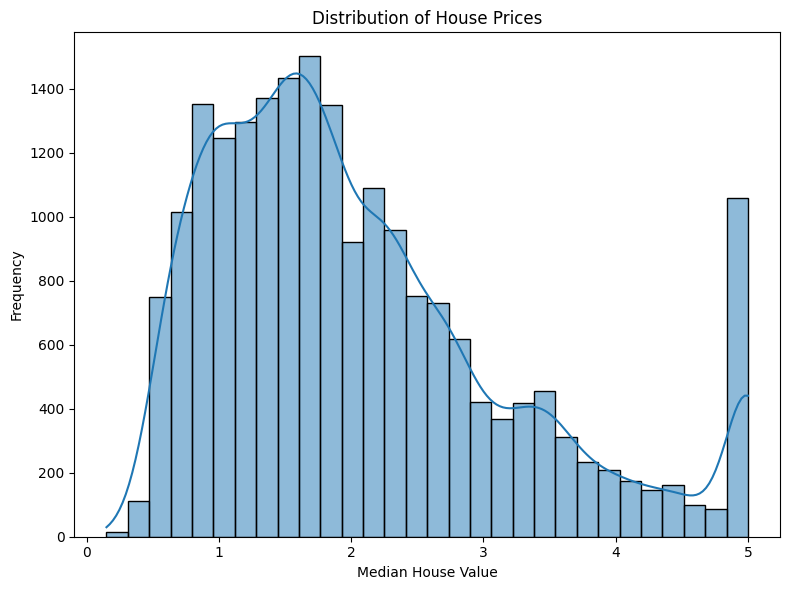

In [20]:
# Distribution of the target variable (House prices)
plt.figure(figsize=(8, 6))
sns.histplot(y, bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

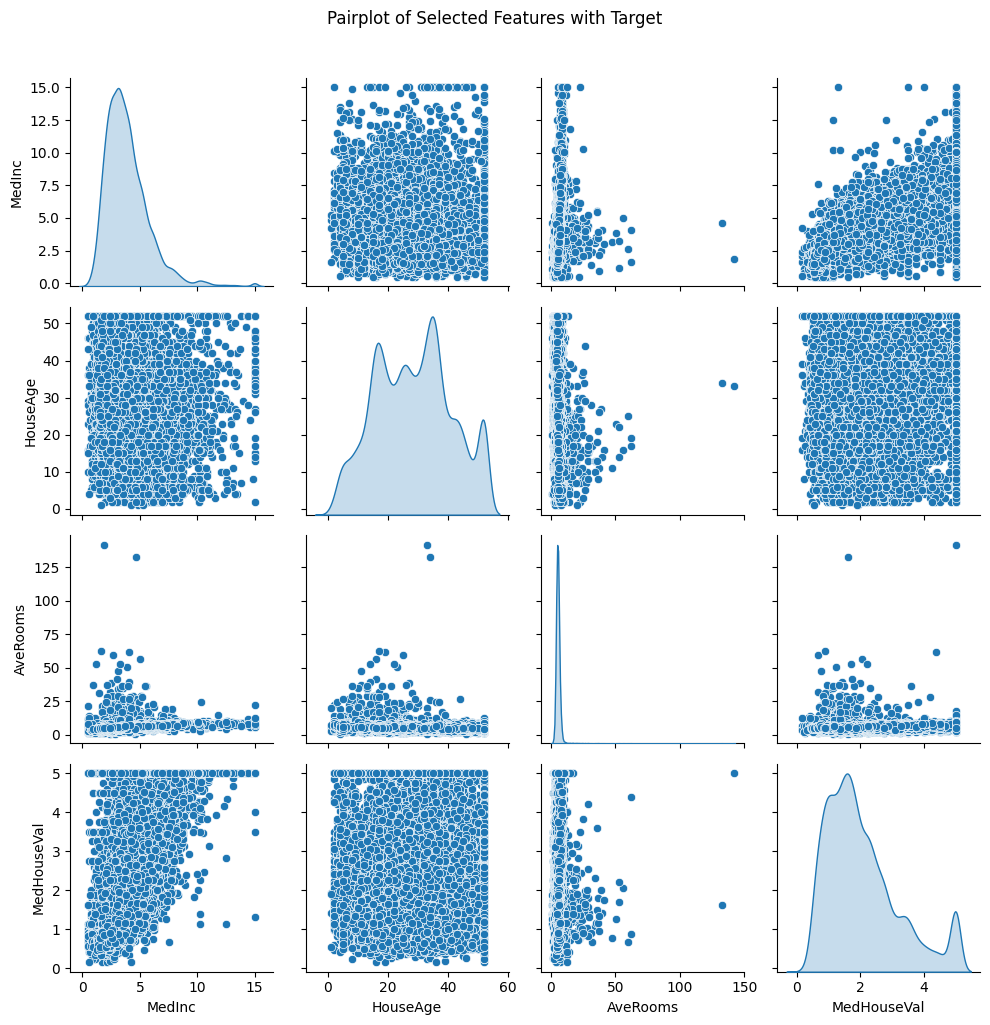

In [21]:
# Pairplot for a few selected features to see pairwise relationships
sns.pairplot(pd.concat([X[['MedInc', 'HouseAge', 'AveRooms']], y], axis=1), diag_kind='kde')
plt.suptitle('Pairplot of Selected Features with Target', y=1.02)
plt.tight_layout()
plt.show()

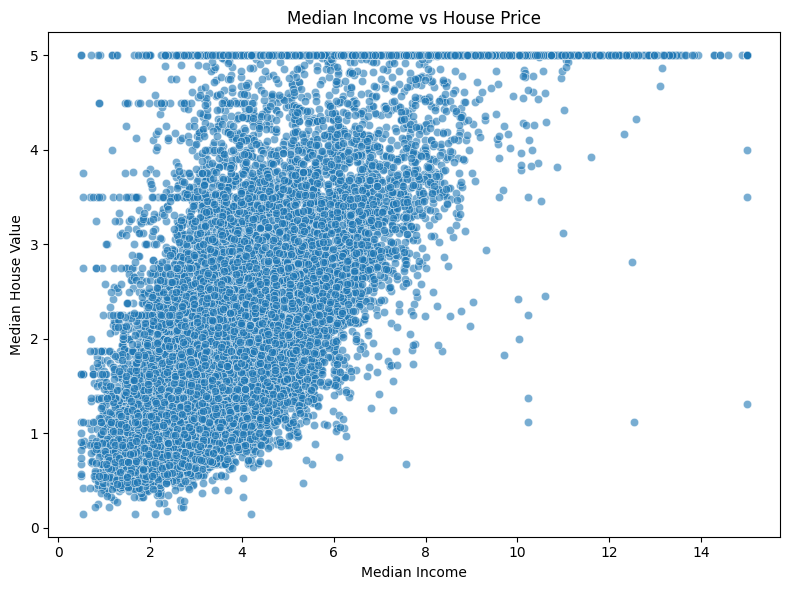

In [22]:
# Scatter plot of median income vs. house price
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['MedInc'], y=y, alpha=0.6)
plt.title('Median Income vs House Price')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.tight_layout()
plt.show()

## 3. Model Training and Evaluation

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 8)
(4128, 8)
(16512,)
(4128,)


## Bagging with Random forest

Bagging with Random Forest: An ensemble technique that trains multiple decision trees on different random subsets of the data and averages their predictions to improve accuracy and reduce variance.

In [29]:
# 1. Bagging with Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [30]:
# Evaluate Random Forest
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

In [31]:
# output for random forest
print(rf_r2)
print(rf_rmse)
print(rf_mae)

0.8051230593157366
0.5053399773665033
0.32754256845930246


## Boosting with Gradient Boosting Machines (GBM)

- **Boosting with GBM:** Builds models sequentially, correcting previous errors.
- Focuses on harder-to-predict samples by adjusting weights.
- Combines weak learners for a strong model.
- Reduces bias, improving accuracy in regression and classification.

In [32]:
# 2. Boosting with Gradient Boosting Machines (GBM)
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbm.fit(X_train, y_train)
gbm_pred = gbm.predict(X_test)

In [33]:
# Evaluate GBM
gbm_rmse = np.sqrt(mean_squared_error(y_test, gbm_pred))
gbm_mae = mean_absolute_error(y_test, gbm_pred)
gbm_r2 = r2_score(y_test, gbm_pred)

In [35]:
# output for Gradient boosting machine
print(gbm_r2)
print(gbm_rmse)
print(gbm_mae)

0.7756446042829697
0.5422152016168362
0.3716425690425596


## 3. Boosting with XGBoost
### Boosting with XGBoost
- **XGBoost**: Fast and efficient boosting algorithm.
- Uses gradient boosting with regularization to avoid overfitting.
- Supports parallel processing and handles missing data.

### Mathematical Formula
Objective function:


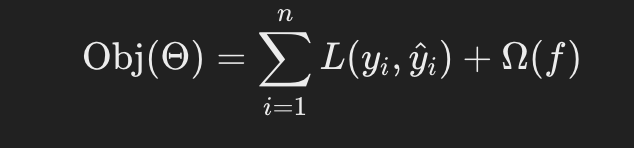


Update step:

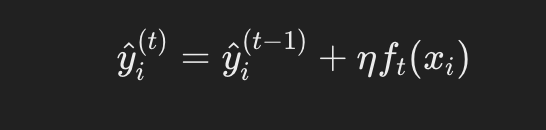

Where:
- \(L): Loss function.
- \(Omega): Regularization term.
- \(eta): Learning rate.

In [37]:
# Boosting with XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

In [38]:
# Evaluate XGBoost
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

In [39]:
# output for XGBoost
print('XGBoost RMSE:', xgb_rmse)
print('XGBoost MAE:', xgb_mae)
print('XGBoost R2:', xgb_r2)

XGBoost RMSE: 0.47672034565362764
XGBoost MAE: 0.3154509897767458
XGBoost R2: 0.8265714813208984


# 4. Boosting with LightGBM

- **LightGBM**: Fast, distributed boosting framework.
- Uses histogram-based algorithms for efficient computation.
- Handles large datasets with low memory usage.
- Excellent for handling categorical features directly.


In [41]:
# Boosting with LightGBM
lgbm = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001308 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.071947


In [42]:
# Evaluate LightGBM
lgbm_rmse = np.sqrt(mean_squared_error(y_test, lgbm_pred))
lgbm_mae = mean_absolute_error(y_test, lgbm_pred)
lgbm_r2 = r2_score(y_test, lgbm_pred)

In [43]:
print('LightGBM RMSE:', lgbm_rmse)
print('LightGBM MAE:', lgbm_mae)
print('LightGBM R2:', lgbm_r2)

LightGBM RMSE: 0.46351720797890145
LightGBM MAE: 0.30775487567243004
LightGBM R2: 0.8360449251645318


## 5. Ensemble of Different Model Types (Stacking)

In [44]:
# Stacking - Added Random Forest, GBM, XGBoost and LightGBM
estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gbm', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=100, random_state=42))
]

In [46]:
# training stacking model
stacking_model = StackingRegressor(estimators=estimators, final_estimator=LGBMRegressor(force_col_wise=True))
stacking_model.fit(X_train, y_train)
stacking_pred = stacking_model.predict(X_test)

[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 3
[LightGBM] [Info] Start training from score 2.071947


In [47]:
# Evaluate Stacking Model
stacking_rmse = np.sqrt(mean_squared_error(y_test, stacking_pred))
stacking_mae = mean_absolute_error(y_test, stacking_pred)
stacking_r2 = r2_score(y_test, stacking_pred)

In [51]:
# Create a DataFrame to hold the evaluation metrics
metrics = {
    'Model': ['Random Forest', 'Gradient Boosting', 'XGBoost', 'LightGBM', 'Stacking Model'],
    'RMSE': [rf_rmse, gbm_rmse, xgb_rmse, lgbm_rmse, stacking_rmse],
    'MAE': [rf_mae, gbm_mae, xgb_mae, lgbm_mae, stacking_mae],
    'R^2': [rf_r2, gbm_r2, xgb_r2, lgbm_r2, stacking_r2]
}

metrics_df = pd.DataFrame(metrics)

# Display the metrics DataFrame
metrics_df.style.set_table_attributes('style="width: 50%; margin: auto;"').set_caption("Model Evaluation Metrics")



## Bar Plot of RMSE for Each Model

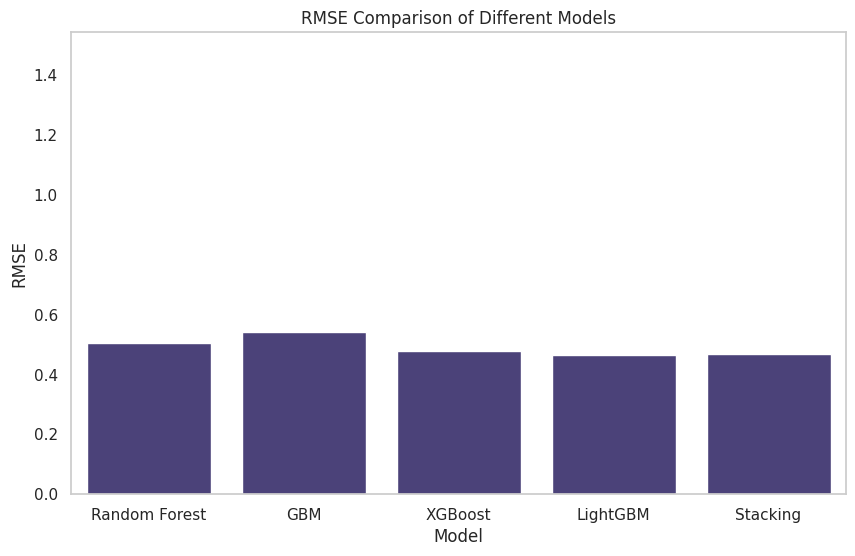

In [57]:
# Create a bar plot for RMSE of each model
model_names = ['Random Forest', 'GBM', 'XGBoost', 'LightGBM', 'Stacking']
rmse_values = [rf_rmse, gbm_rmse, xgb_rmse, lgbm_rmse, stacking_rmse]

plt.figure(figsize=(10, 6))
# Specify colors manually or use the default color cycle
colors = sns.color_palette('viridis', len(model_names))

sns.barplot(x=model_names, y=rmse_values, color=colors[0])  # Using the first color from the palette

plt.title('RMSE Comparison of Different Models')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.ylim(0, max(rmse_values) + 1)  # Adjust y-axis limits for better visualization
plt.grid(axis='y')
plt.show()


## Box Plot of Actual vs. Predicted Prices for Stacking Model and Boosting Models

This box plot will show the distribution of actual prices and predicted prices from the stacking model and boosting models, highlighting the range and median of the predictions.

<ipython-input-58-ca4590c6e01c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=results_melted, x='Model', y='Predicted Price', palette='coolwarm')


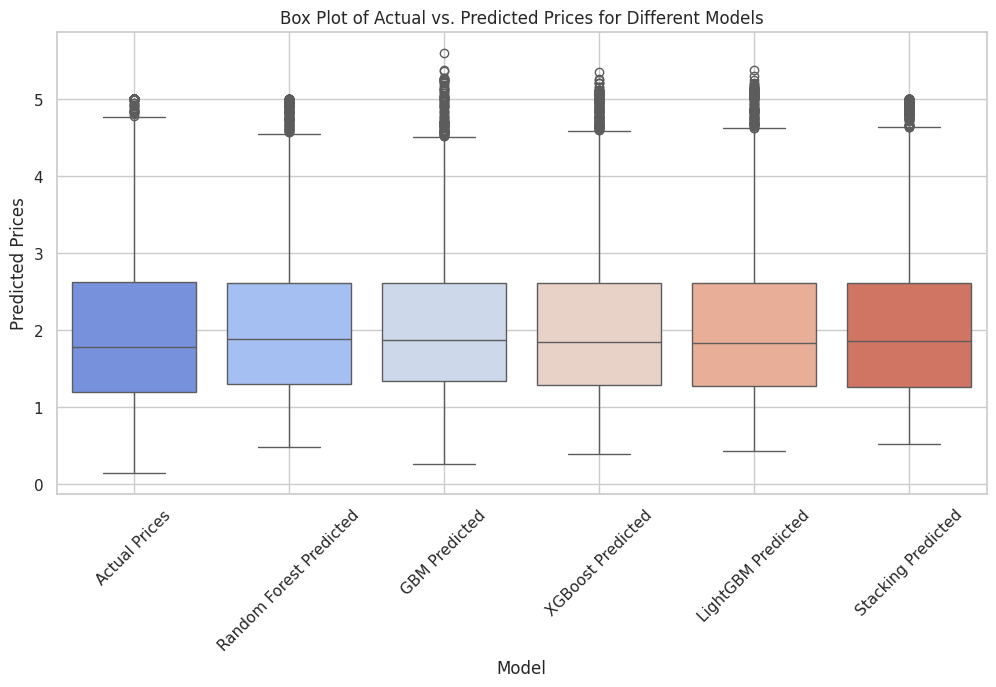

In [58]:
# Create a DataFrame for actual and predicted prices
results_df = pd.DataFrame({
    'Actual Prices': y_test,
    'Random Forest Predicted': rf_pred,
    'GBM Predicted': gbm_pred,
    'XGBoost Predicted': xgb_pred,
    'LightGBM Predicted': lgbm_pred,
    'Stacking Predicted': stacking_pred
})

# Melt the DataFrame for easier plotting
results_melted = results_df.melt(var_name='Model', value_name='Predicted Price')

plt.figure(figsize=(12, 6))
sns.boxplot(data=results_melted, x='Model', y='Predicted Price', palette='coolwarm')
plt.title('Box Plot of Actual vs. Predicted Prices for Different Models')
plt.xlabel('Model')
plt.ylabel('Predicted Prices')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Comparison of Feature Importances Across Models

In [70]:
from math import pi

# Number of features
num_features = len(features)

# Create a radar chart
angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()

# The radar chart needs to be closed, so we need to "complete the loop"
rf_importances = np.concatenate((rf_importances, [rf_importances[0]]))
gbm_importances = np.concatenate((gbm_importances, [gbm_importances[0]]))
xgb_importances = np.concatenate((xgb_importances, [xgb_importances[0]]))
lgbm_importances = np.concatenate((lgbm_importances, [lgbm_importances[0]]))
angles += angles[:1]

plt.figure(figsize=(10, 10))

# Draw one axe per feature and add labels
ax = plt.subplot(111, polar=True)
ax.fill(angles, rf_importances, color='blue', alpha=0.25, label='Random Forest')
ax.fill(angles, gbm_importances, color='orange', alpha=0.25, label='GBM')
ax.fill(angles, xgb_importances, color='green', alpha=0.25, label='XGBoost')
#ax.fill(angles, lgbm_importances, color='red', alpha=0.25, label='LightGBM')

# Add feature labels
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(features, fontsize=12)
plt.title('Feature Importance Radar Chart', fontsize=16)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
plt.show()


In [69]:
# Assuming you have trained your models and calculated the importances
# Check that these values are non-zero before plotting
rf_importances = rf.feature_importances_
gbm_importances = gbm.feature_importances_
xgb_importances = xgb.feature_importances_
lgbm_importances = lgbm.feature_importances_

# Create a DataFrame for feature importances
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Random Forest': rf_importances,
    'GBM': gbm_importances,
    'XGBoost': xgb_importances,
    'LightGBM': lgbm_importances
})

# Melt the DataFrame for easier plotting
importance_melted = importance_df.melt(id_vars='Feature', var_name='Model', value_name='Importance')

# Grouped Bar Chart
plt.figure(figsize=(14, 8))
bar_width = 0.15
index = np.arange(len(features))

# Plotting each model's feature importances
plt.bar(index, rf_importances, bar_width, label='Random Forest')
plt.bar(index + bar_width, gbm_importances, bar_width, label='GBM')
plt.bar(index + 2 * bar_width, xgb_importances, bar_width, label='XGBoost')

# Customizing the plot
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importance Comparison Across Models', fontsize=16)
plt.xticks(index + bar_width * 1.5, features, rotation=45, ha='right')
plt.legend(title='Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style='whitegrid')

# 1. Actual vs. Predicted Values with a Regression Line
plt.figure(figsize=(10, 6))

# Scatter plot with a different color (green) and transparency
sns.scatterplot(x=y_test, y=stacking_pred, color='green', alpha=0.6, edgecolor='w', s=100)

# Adding a regression line
sns.regplot(x=y_test, y=stacking_pred, scatter=False, color='orange', line_kws={'linestyle':'--', 'linewidth':1.5})

# Plotting the 45-degree line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=1)  # Diagonal line

# Title and labels
plt.title('Actual vs. Predicted Values (Stacking Model)', fontsize=16)
plt.xlabel('Actual Prices', fontsize=14)
plt.ylabel('Predicted Prices', fontsize=14)
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid(True)

# Show the plot
plt.show()


# Conclusion

### Conclusion

In this project, we used various ensemble learning techniques to predict house prices using the California housing dataset. The methods included:

1. **Random Forest (Bagging)**: Reduced variance by averaging multiple decision trees, providing a solid baseline.
2. **Boosting (GBM, XGBoost, LightGBM)**: Improved accuracy by iteratively learning from errors. LightGBM performed best among the boosting methods due to its speed and efficiency.
3. **Stacking Ensemble**: Combined multiple models (Random Forest, GBM, XGBoost, LightGBM) using a meta-learner, achieving the highest R² score and best overall performance.

### Key Insights:
- **Performance**: Stacking showed the best accuracy, followed by LightGBM. Boosting methods outperformed Random Forest due to their focus on correcting errors.
- **Feature Importance**: Median income and room count were key predictors across models.
- **Hyperparameter Tuning**: Fine-tuning was crucial for boosting models, leading to better accuracy.

Overall, ensemble methods proved to be powerful, with stacking offering the best results. Ensemble learning's ability to combine strengths of different models makes it ideal for complex regression tasks like house price prediction.

## References
Scikit-Learn Documentation:

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., et al. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825-2830. Retrieved from http://www.jmlr.org/papers/volume12/pedregosa11a/pedregosa11a.pdf
Gradient Boosting Machines:

Friedman, J. H. (2001). Greedy Function Approximation: A Gradient Boosting Machine. Annals of Statistics, 29(5), 1189-1232. Retrieved from https://projecteuclid.org/euclid.aos/1003315054
Random Forests:

Breiman, L. (2001). Random Forests. Machine Learning, 45(1), 5-32. Retrieved from https://link.springer.com/article/10.1023/A:1010933404324
Bagging and Boosting:

Zhang, H. (2004). The Optimality of Naive Bayes. AAAI 2004 - Proceedings of the Twenty-First National Conference on Artificial Intelligence, 21, 104-109. Retrieved from https://www.aaai.org/Papers/AAAI/2004/AAAI04-018.pdf

# Licensing

MIT License

Copyright 2024 Adarsh Pathak, Sajiri Gokak, Somesh Banerjee

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# Additional

Difference in feature importance in LightGBM and other models. Detailed discription in book.

In [74]:
# Assuming you have already trained your LightGBM model and obtained the feature importances
lgbm_importances = lgbm.feature_importances_
features = X.columns

# Create a DataFrame for LightGBM feature importances
lgbm_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': lgbm_importances
})

# Sort the DataFrame by importance
lgbm_importance_df = lgbm_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=lgbm_importance_df, palette='viridis')
plt.title('Feature Importance (LightGBM)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(True)
plt.show()


<ipython-input-74-f0723dad5e6b>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=lgbm_importance_df, palette='viridis')


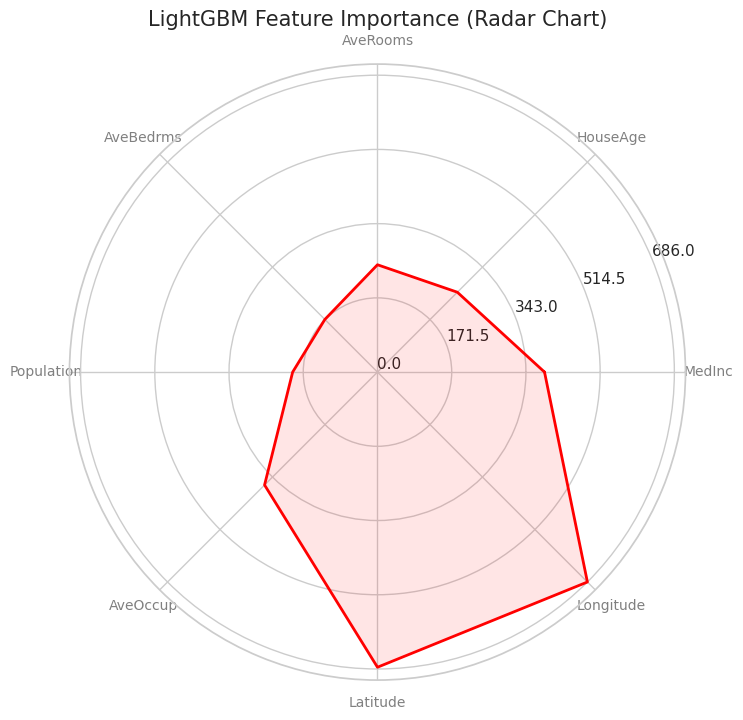

In [75]:
# Import necessary libraries
from math import pi

# Get feature importances and prepare data
lgbm_importances = lgbm.feature_importances_
features = X.columns
values = lgbm_importances.tolist() + [lgbm_importances[0]]  # Close loop
angles = np.linspace(0, 2 * np.pi, len(features), endpoint=False).tolist() + [0]

# Plot radar chart
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.plot(angles, values, color='red', linewidth=2)
ax.fill(angles, values, color='red', alpha=0.1)
plt.xticks(angles[:-1], features, color='grey', size=10)
ax.set_yticks(np.linspace(0, max(values), 5))
plt.title('LightGBM Feature Importance (Radar Chart)', size=15)
plt.show()